In [1]:
import numpy as np 
import pandas as pd 


In [2]:
df = pd.read_csv("Crop_recommendation.csv")

In [3]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
X=df.drop("label",axis=1)

In [5]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [6]:
y = df["label"]

In [7]:
y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [8]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [9]:
y.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

### LOGISTIC REGRESSION THROUGH ONEVSRESTCLASSIFIER

In [10]:
# now Iam trying to fit all different models to analyze which model is giving best performance in multiple classes first Iam trying to use logistic regression in OnevsAll classifier..
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
ovr_pipelilne = Pipeline([
    ('standardscaler', StandardScaler()),
    ('onevsrestclassifier', OneVsRestClassifier(
        estimator=LogisticRegression(random_state=42))
)])
n_param = {
    'onevsrestclassifier__estimator__C': [0.1, 0.5, 0.75, 1],
    'onevsrestclassifier__estimator__penalty': ['l2']
}
log_grid = GridSearchCV(ovr_pipelilne,n_param,n_jobs=-1,cv=3,scoring='accuracy')
log_grid.fit(X_train,y_train)

,estimator,Pipeline(step..._state=42)))])
,param_grid,"{'onevsrestclassifier__estimator__C': [0.1, 0.5, ...], 'onevsrestclassifier__estimator__penalty': ['l2']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [24]:
log_y_pred = log_grid.predict(X_test)
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,log_y_pred)

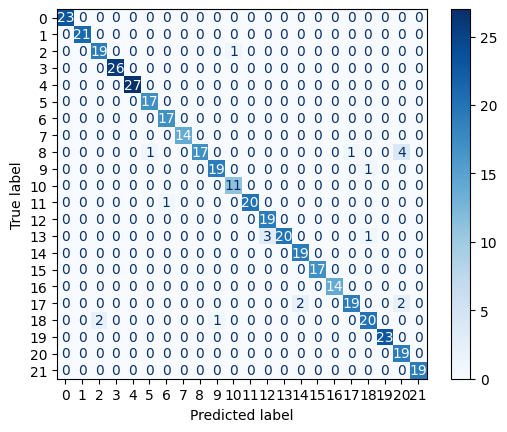

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
dis=ConfusionMatrixDisplay(matrix)
dis.plot(cmap="Blues")
plt.show()

### SVM

In [26]:
# we have seen the confusion matrix of logistic regression and we conclude it is not bad at all it is good at predicting the class but it has made some mistakes now we will try SVM's SVC and will check its performance

from sklearn.svm import SVC
svc_pipeline = Pipeline([
    ('StandardScaler',StandardScaler()),
    ('SVC',SVC(random_state=42))
])
n_param={
    'SVC__C':(0.1,0.25,0.50,0.75,1),
    'SVC__kernel': ['linear', 'rbf'],
    'SVC__gamma': ['scale', 'auto']
    
}
svc_grid=GridSearchCV(
    svc_pipeline,n_param , n_jobs=-1,cv=3,scoring="accuracy"
)
svc_grid.fit(X_train,y_train)


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'SVC__C': (0.1, ...), 'SVC__gamma': ['scale', 'auto'], 'SVC__kernel': ['linear', 'rbf']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


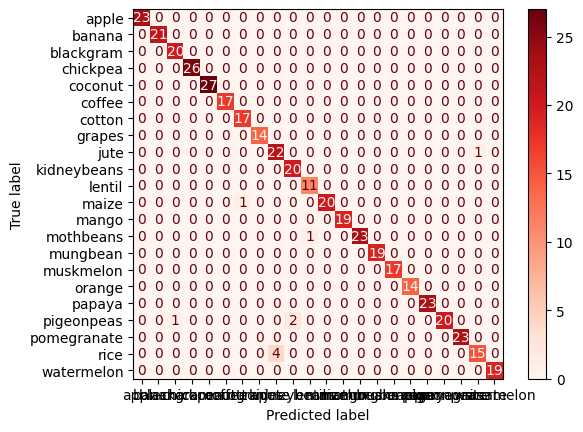

In [27]:
svc_y_pred = svc_grid.predict(X_test)
svc_matrix = confusion_matrix(y_test,svc_y_pred)
disp = ConfusionMatrixDisplay(svc_matrix, display_labels=svc_grid.classes_)
disp.plot(cmap="Reds", xticks_rotation='horizontal')
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier
n_param={
    'n_estimators':[100,150,200,250,300,500],
    'max_depth':[5,7,10,15,20,25],
    'min_samples_split':[2,5,7,9,11,12],

}

RandomForest_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),n_param,n_jobs=-1,cv=3,scoring="accuracy"
)
RandomForest_grid.fit(X_train,y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [5, 7, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 150, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


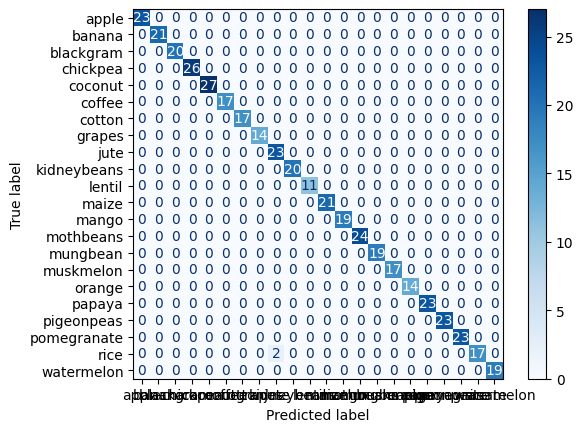

In [28]:
Random_y_pred = RandomForest_grid.predict(X_test)
r_matrix = confusion_matrix(y_test,Random_y_pred)
displa = ConfusionMatrixDisplay(r_matrix,display_labels=RandomForest_grid.classes_)
displa.plot(cmap="Blues")
plt.show()

### now comparing the model performance and printing the best model among the three

In [29]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
results=[]
for name,preds in [("OneVsRest_logistic_regression",log_y_pred),("SVC",svc_y_pred),("RandomForest",Random_y_pred)]:
        results.append(
                {
                        "Model": name,
                        "Accuracy": accuracy_score(y_test, preds),
                        "Precision": precision_score(y_test, preds, average='weighted'),
                        "Recall": recall_score(y_test, preds, average='weighted'),
                        "F1-Score": f1_score(y_test, preds, average='weighted')
                }
        )
pd.DataFrame(results)        

,Model,Accuracy,Precision,Recall,F1-Score
0,OneVsRest_logistic_regression,0.954545,0.959292,0.954545,0.954049
1,SVC,0.977273,0.978733,0.977273,0.977062
2,RandomForest,0.995455,0.995818,0.995455,0.995423


In [30]:
import joblib
joblib.dump(RandomForest_grid,"RandomForestClassifier.pkl")

['RandomForestClassifier.pkl']